# Introduction to Natural Language Processing: Assignment 2

In this exercise we'll practice training and testing classifiers.

- You can use built-in Python packages, scikit-learn and Pandas.
- Please comment your code
- Submissions are due Sunday at 23:59 **only** on Ilias: **Assignmnets >> Student Submissions >> Assignment 2 (Deadline: 30.04.2023, at 23:59)**

- Name the file aproppriately "Assignment_2_\<Your_Name\>.ipynb".
- Please use relative paths, your code should run on my computer if the notebook and the file are both in the same directory.

Example: file_name = polarity.txt >> **DON'T use:** /Users/ComputerName/Username/Documents/.../polarity.txt

### Task 1.1 (1 point)

Create a DataFrame using the `polarity.txt` file and give name to the columns appropriately. (e.g., "Text", "Label")

In [1]:
import pandas as pd

In [2]:
#here comes your code
dict = {}
texts_list = []
label_list = []
with open("polarity.txt", "r", encoding='utf-8-sig') as infile: 
    for line in infile: 
        key, value = line.strip().split("\t")
        texts_list.append(key)
        label_list.append(value)

dict["Text"] = texts_list
dict["Label"] = label_list

df = pd.DataFrame(data=dict)

display(df)

,Text,Label
0,every now and then a movie comes along from a ...,pos
1,"mtv films' _election , a high school comedy st...",pos
2,did anybody know this film existed a week befo...,pos
3,the plot is deceptively simple .,pos
4,george washington carver high school is having...,pos
...,...,...
69,it also wrapped production two years ago and h...,neg
70,whatever . . . skip,neg
71,it !,neg
72,where's joblo coming from ?,neg


### Task 1.2 (1 point)

Create a new column for the DataFrame that contains labels converted to numerical values instead of strings using the function: `apply()` and drop the original column afterwards.

Hint: The numarical values can be any meaningful values, e.g., pos >> 1 and neg >> 0

In [3]:
# here comes your code
def converter(input_string):
    if input_string == "pos":
        return 1
    elif input_string == "neg":
        return 0
df2 = df
df["Label"] = df["Label"].apply(converter)

In [4]:
display(df)

,Text,Label
0,every now and then a movie comes along from a ...,1
1,"mtv films' _election , a high school comedy st...",1
2,did anybody know this film existed a week befo...,1
3,the plot is deceptively simple .,1
4,george washington carver high school is having...,1
...,...,...
69,it also wrapped production two years ago and h...,0
70,whatever . . . skip,0
71,it !,0
72,where's joblo coming from ?,0


### Bonus point (1 point)

Is there any other way of converting strings in the column label to numerical values without using the function: `apply()`?

In [5]:
#here comes your code


{1: None, 0: None}


### Task 2 (4 points)

Write a function `create_count_and_probability` that takes a file (`corpus.txt`) as input and returns a csv file as output containing three columns:
1. Text
2. Count_Vector
3. Probability

Example:

For the line: `This document is the second document.`

The row in the csv file should contain:
`This document is the second document.`   `[0,2,0,1,0,1,1,0,1]`   `[1/6, 2/6, 1/6, 1/6, 1/6, 2/6]`

**Note**:

1. You should define your own function and not use e.g., CountVectorizer() which gives you the `count vector`, directly.

2. You can either use the whitespace in `split` as the seperator or use the `Regular Expression (re)` to extract the words, as follows:

```
import re
TEXT = "Hey, - How are you doing today!?"
words_list = re.findall(r"[\w']+", TEXT)
print(words_list)
```

3. To count the words, you can use e.g., the library: `collections`, more specifically `Counter`.

4. Please don't upload the output file. Your function should generate the file.

In [6]:
import re
import pandas as pd

In [7]:
def extract_words(line):
    words_list = re.findall(r"[\w']+", line)
    return [x.lower() for x in words_list]

In [8]:
def sentence_count_and_probability(sentence, dictionary):
    count_vector = [0] * len(dictionary)
    probability = []
    probability_lookup = dict.fromkeys(sentence, 0)
    for word in sentence:
        count_vector[dictionary[word]] += 1
        probability_lookup[word] += 1
        probability.append(probability_lookup[word]/len(sentence))

    return count_vector, probability


In [9]:
def create_count_and_probability(file_name):
    # here comes your code
    words_list = []
    sentences = []
    original_sentences = []
    with open(file_name, "r") as infile: 
        for line in infile:
            original_sentences.append(line.strip('\n'))
            words_list.extend(extract_words(line))
            sentences.append(extract_words(line))

    unique_words = list(dict.fromkeys(words_list))
    lookup_dict = {}
    for ind, word in enumerate(unique_words):
        lookup_dict[word] = ind

    d = {"Text" : [], "Count_Vector" : [], "Probability" : []}
    Text = []
    Count_Vec = []
    Prob = []
    for i, sentence in enumerate(sentences):
        count_vector, probability = sentence_count_and_probability(sentence, lookup_dict)
        Text.append(original_sentences[i])
        Count_Vec.append(count_vector)
        Prob.append(probability) #probabilities are in a decimal form. 
    
    d["Text"] = Text
    d["Count_Vector"] = Count_Vec
    d["Probability"] = Prob
    print(d)
    df = pd.DataFrame(data=d)
    
    df.to_csv("corpus_count_and_probability.csv", index=False) #writing to csv file. 

    return df #it returns the content of the csv file (as a dataframe) but it doesn't literally return csv file. I hope this solution is alright, since 
    # I thought that generating file is enough.


In [31]:
df = create_count_and_probability("corpus.txt") #generating csv file

{'Text': ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?'], 'Count_Vector': [[1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 2, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0, 0, 0]], 'Probability': [[0.2, 0.2, 0.2, 0.2, 0.2], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666], [0.2, 0.2, 0.2, 0.2, 0.2]]}


In [11]:
df2 = pd.read_csv("corpus_count_and_probability.csv") #confirmation it works

display(df2)

,Text,Count_Vector,Probability
0,This is the first document.,"[1, 1, 1, 1, 1, 0, 0, 0, 0]","[0.2, 0.2, 0.2, 0.2, 0.2]"
1,This document is the second document.,"[1, 1, 1, 0, 2, 1, 0, 0, 0]","[0.16666666666666666, 0.16666666666666666, 0.1..."
2,And this is the third one.,"[1, 1, 1, 0, 0, 0, 1, 1, 1]","[0.16666666666666666, 0.16666666666666666, 0.1..."
3,Is this the first document?,"[1, 1, 1, 1, 1, 0, 0, 0, 0]","[0.2, 0.2, 0.2, 0.2, 0.2]"


### Task 3 (4 points)

The goal of this task is to train and test classifiers provided in scikit-learn, using two datasets `rural.txt` and `science.txt`.

a) Each file (rural and science) contains sentence-wise documents. You should create a dataframe containing two columns: "Document" and " Class", as shown below. This dataframe will be used later as input for the vectorizer.

|Document                             |Class |
| ------------------------------------|----- | 
|PM denies knowledge of AWB kickbacks | rural |
|The crocodile ancestor fossil, found...| science |

 
b) Split the data into train (70%) and test (30%) sets and use the tf-idf-vectorizer to train following classifiers provided by scikit-learn:

- naive_bayes.GaussianNB()
- svm.LinearSVC(). 

c) Evaluate both classifiers using the test set, report accuracy, recall_bayes, precision, f1 scores and confusion matrix.

**Hints:**
1. The Gaussian NB Classifier takes a dense matrix as input and the output of the vectorizer is a sparse matrix. Use my_matrix.toarray() for this conversion.
2. You can play around with various parameters in both the tf-idf-vectorizer and the classifier to get a better performance in terms of the accuracy. (In the exercise, we will discuss the accuracy of your model.)

In [12]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [13]:
# Here comes your code
df = pd.read_csv("rural.txt", sep="\t", names=["Document", "Class"], header=None)
df["Class"] = "rural"

df2 = pd.read_csv("science.txt", sep="\t", names=["Document", "Class"], header=None)
df2["Class"] = "science"
df2.head(13)

data = pd.concat([df,df2])
data = shuffle(data)
data.reset_index(inplace=True, drop=True)
data.head(10)

,Document,Class
0,Papagrigorakis and his team say the DNA sequen...,science
1,We believe this report to be of outstanding im...,science
2,Researchers were intrigued when spacecraft dat...,science
3,The new planet has mass more than five times t...,science
4,But Mr McGauran says it is too early to talk a...,rural
5,Far north Queensland's horticulture industry h...,rural
6,The underlying aim of this experiment is to in...,science
7,"The launch vehicle, an Atlas 5 rocket with two...",science
8,"If growers aren't making any money, they can't...",rural
9,"The technique uses chemiluminescence, a light ...",science


In [14]:
# labelencoder = LabelEncoder()
# labelencoder.fit(data["Class"])
# data.head(10)

In [15]:
# labelencoder.classes_

In [16]:
# labelencoder.transform(["rural", "science"]) #encoding labels to 0 and 1 isn't necessary

In [17]:
# data["Class"] = labelencoder.transform(data["Class"])

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(data["Document"], data["Class"], train_size=0.7, random_state=1234)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer(smooth_idf=True, use_idf=True) #experimented different parameters but they are not necessary. Same results were achieved with a default TfIdVectorizer.
vectorized_X_train = vectorizer.fit_transform(X_train)
dense_X_train = vectorized_X_train.toarray() # creating dense matrix

In [21]:
svm_classifier = svm.LinearSVC()
naive_bayes_clf = GaussianNB()

In [22]:
svm_classifier.fit(dense_X_train, Y_train)
naive_bayes_clf.fit(dense_X_train, Y_train)


GaussianNB()

In [23]:
vectorized_X_test = vectorizer.transform(X_test)
dense_X_test = vectorized_X_test.toarray()
svm_preds = svm_classifier.predict(dense_X_test) #same results with a sparse matrix but put dense vector anyway
bayes_preds = naive_bayes_clf.predict(dense_X_test)

In [24]:
print(svm_preds)

['rural' 'rural' 'rural' 'science' 'rural' 'rural' 'rural' 'rural'
 'science' 'science' 'rural' 'science' 'science' 'rural' 'rural' 'rural'
 'rural' 'science' 'rural' 'rural' 'science' 'science' 'science' 'science'
 'science' 'rural' 'science' 'science' 'science' 'rural' 'science'
 'science' 'science' 'rural' 'science' 'science' 'science' 'rural' 'rural'
 'science' 'rural' 'science' 'rural' 'rural' 'rural' 'rural' 'rural'
 'rural' 'science' 'science' 'science' 'science' 'rural' 'science' 'rural'
 'rural' 'science' 'rural' 'science' 'science' 'science' 'rural' 'science'
 'science' 'rural' 'rural' 'science' 'science' 'science' 'rural' 'science'
 'rural' 'science' 'science' 'rural' 'science' 'rural' 'science' 'rural'
 'science' 'rural' 'rural' 'science' 'science' 'science' 'rural' 'science'
 'rural' 'science' 'rural' 'science' 'rural' 'science' 'rural' 'rural'
 'science' 'rural' 'rural' 'rural' 'science' 'science' 'rural' 'rural'
 'science' 'science' 'science' 'science' 'rural' 'science' 

In [25]:
correct_answers_svm = np.sum(np.equal(svm_preds, Y_test))
svm_accuracy = correct_answers_svm / (len(svm_preds)*1.0) * 100

correct_answers_bayes = np.sum(np.equal(bayes_preds, Y_test))
bayes_accuracy = correct_answers_bayes / (len(bayes_preds)*1.0) * 100

print(f"SVM Acc: {svm_accuracy}")
print(f"Bayes Acc: {bayes_accuracy}")

SVM Acc: 95.75163398692811
Bayes Acc: 90.84967320261438


In [26]:
cm_svm = confusion_matrix(Y_test, svm_preds, labels=svm_classifier.classes_)
tn_svm = cm_svm[0][0]
fn_svm = cm_svm[1][0]
tp_svm = cm_svm[1][1]
fp_svm = cm_svm[0][1]

cm_bayes = confusion_matrix(Y_test, bayes_preds, labels=naive_bayes_clf.classes_)
tn_bayes = cm_bayes[0][0]
fn_bayes = cm_bayes[1][0]
tp_bayes = cm_bayes[1][1]
fp_bayes = cm_bayes[0][1]

In [27]:
precision_svm = tp_svm/(tp_svm+fp_svm)
recall_svm = tp_svm/(tp_svm+fn_svm)
F1_SVM = 2*(precision_svm*recall_svm)/(precision_svm+recall_svm)

precision_bayes = tp_bayes/(tp_bayes+fp_bayes)
recall_bayes = tp_bayes/(tp_bayes+fn_bayes)
F1_BAYES = 2*(precision_bayes*recall_bayes)/(precision_bayes+recall_bayes)

In [28]:
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1 Score: {F1_SVM}")
print(f"Bayes Precision: {precision_bayes}")
print(f"Bayes Recall: {recall_bayes}")
print(f"Bayes F1 Score: {F1_BAYES}")

SVM Precision: 0.9263803680981595
SVM Recall: 0.993421052631579
SVM F1 Score: 0.9587301587301588
Bayes Precision: 0.9025974025974026
Bayes Recall: 0.9144736842105263
Bayes F1 Score: 0.9084967320261438


### SVM Classifier Confusion Matrix

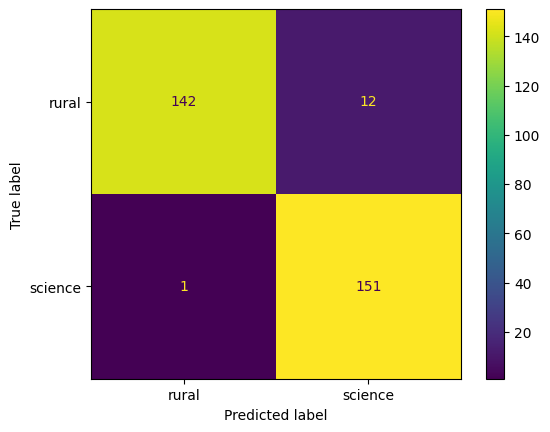

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_classifier.classes_)
disp.plot()

### Naive Bayes Classifier confusion matrix

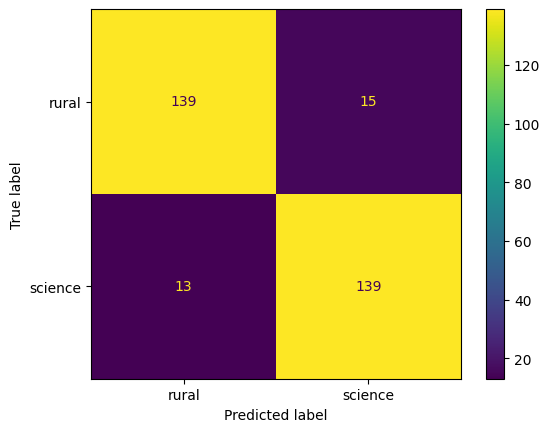

In [30]:
disp_bayes = ConfusionMatrixDisplay(confusion_matrix=cm_bayes, display_labels=naive_bayes_clf.classes_)
disp_bayes.plot()

### Comments:
Bayes classifier seems to be performing worse. Especially, one can see that in the F1 score. While number of TP's is the same for SVM and naive bayes clf, number FP's and FN's is bigger in the naive bayes clf. I experimented with TfIdfVectorizer parameters but none of them seem to help that much in improving metrics. 